<a href="https://colab.research.google.com/github/9bishal/TensorFlow_Project/blob/main/Working_with_large_dats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###The large Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [2]:

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance["sex"], insurance["smoker"] , insurance["age"]

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object,
 0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [4]:
#let's try one-hot encoding our dataframe so it's all number
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot = insurance_one_hot.astype(int)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30,3,10600,0,1,1,0,0,1,0,0
1334,18,31,0,2205,1,0,1,0,1,0,0,0
1335,18,36,0,1629,1,0,1,0,0,0,1,0
1336,21,25,0,2007,1,0,1,0,0,0,0,1


###Let's Build a Model

In [5]:
#Creating  X and Y values(features and labels)
x=insurance_one_hot.drop("charges", axis=1)
y=insurance_one_hot["charges"]
y

,charges
0,16884
1,1725
2,4449
3,21984
4,3866
...,...
1333,10600
1334,2205
1335,1629
1336,2007


In [6]:
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,1,0,0,1,0,0,0,1
1,18,33,1,0,1,1,0,0,0,1,0
2,28,33,3,0,1,1,0,0,0,1,0
3,33,22,0,0,1,1,0,0,1,0,0
4,32,28,0,0,1,1,0,0,1,0,0


In [7]:
#Creating training and  test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)# 0.2 mean 20% of the total data i.e. 0.2*1338=267.6
len(x),len(x_train), len(y), len(y_train), len(x_test), len(y_test)

(1338, 1070, 1338, 1070, 268, 268)

In [17]:
import numpy as np

# Convert to NumPy arrays if not already
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)


In [9]:
print("x_train shape:", x_train.shape)  # Should be (number_of_samples, 1) for 1D data
print("y_train shape:", y_train.shape)  # Should be (number_of_samples,)


x_train shape: (1070, 11)
y_train shape: (1070,)


In [18]:
#Building the neural networks data (sort like model_1 as of the previous one)
tf.random.set_seed(42)

#1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(11,), activation='relu'),  # input shape should match x_train (11 features)
    tf.keras.layers.Dense(1)  # Output layer (e.g., for regression, it could be a single value)
])

#2. Comiple the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])


In [25]:
insurance_model.fit(x_train, y_train, epochs=100, verbose=1)


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7181.1733 - mae: 7181.1733
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6843.0112 - mae: 6843.0112
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6581.6021 - mae: 6581.6021
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7132.5337 - mae: 7132.5337
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6683.4482 - mae: 6683.4482
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7011.9155 - mae: 7011.9155
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7203.5464 - mae: 7203.5464
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6650.0029 - mae: 6650.0029
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7191.8267 - mae: 7191.8267
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6782.4292 - mae: 6782.4292
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7113.6426 - mae: 7113.6426
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

In [ ]:
y_preds=insurance_model.predict(x_test)
y_preds

In [26]:
insurance_model.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 5151.4775 - mae: 5151.4775


[5042.70654296875, 5042.70654296875]

In [31]:
y_train.mean()

13345.596261682243

#Our model isn't performing too well, let's try and improve the model

Doing the 3 model experiment as we did in last notebook

1. Add an extra layer with more hidden unit.

2. Train for the longer



In [54]:
tf.random.set_seed(42)
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(11,), activation="relu"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])





In [57]:
insurance_model_2.fit(x_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5300.2158 - mae: 5300.2158
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5259.9321 - mae: 5259.9321
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5219.5894 - mae: 5219.5894
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5176.4927 - mae: 5176.4927
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5131.6211 - mae: 5131.6211
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5085.0415 - mae: 5085.0415
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5036.5005 - mae: 5036.5005
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4987.1895 - mae: 4987.1895
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4935.3550 - mae: 4935.3550
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4883.2061 - mae: 4883.2061
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4827.0190 - mae: 4827.0190
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

In [ ]:
y_preds_2=insurance_model_2.predict(x_test)
y_preds

In [63]:
insurance_model_2.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3312.5957 - mae: 3312.5957


[3225.575439453125, 3225.575439453125]

In [60]:
tf.random.set_seed(42)
insurance_model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(11,), activation="relu"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])





/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
history=insurance_model_3.fit(x_train, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3137.8928 - mae: 3137.8928
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3133.8792 - mae: 3133.8792
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3125.9404 - mae: 3125.9404
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3120.7129 - mae: 3120.7129
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3113.3657 - mae: 3113.3657
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3105.3960 - mae: 3105.3960
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3100.1462 - mae: 3100.1462
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3094.0571 - mae: 3094.0571
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3088.4434 - mae: 3088.4434
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3083.3042 - mae: 3083.3042
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3077.5593 - mae: 3077.5593
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

In [62]:
insurance_model_3.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2958.2773 - mae: 2958.2773


[2900.794921875, 2900.794921875]

Text(0.5, 0, 'Epochs')

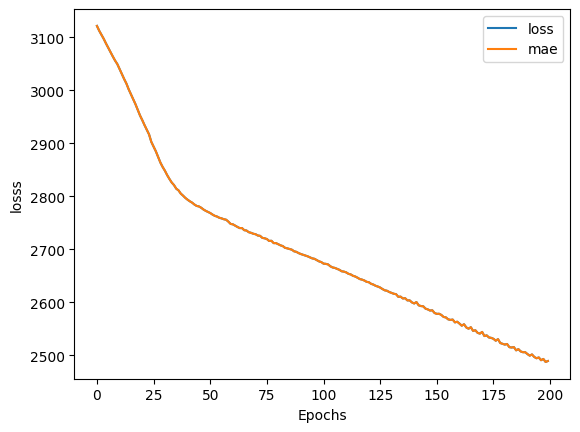

In [70]:
pd.DataFrame(history.history).plot()
plt.ylabel("losss")
plt.xlabel("Epochs")

#PreProcessing Data (Normalizaton and standardization)

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Text(0, 0.5, 'Age')

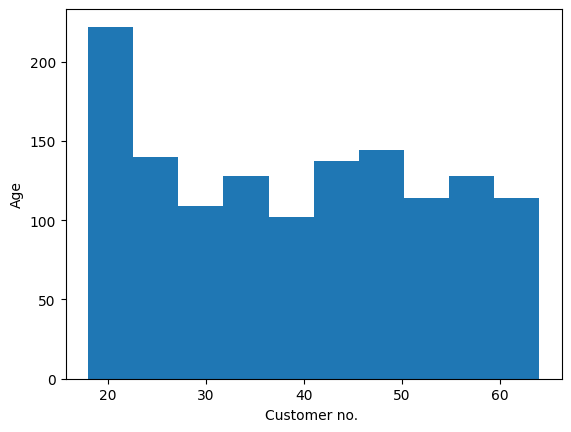

In [73]:
x["age"].plot(kind="hist")
plt.xlabel("Customer no. ")
plt.ylabel("Age")